In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
d_train=pd.read_csv('train.csv')
d_test=pd.read_csv('test.csv')

In [3]:
d_train.shape #train csv seems to have no null values

(6650, 11)

In [4]:
d_train.isna().sum()

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

In [5]:
d_train.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1


In [6]:
d_test.isna().sum() #test data also doesn't have any null values

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
dtype: int64

In [7]:
d_test.shape

(2851, 10)

In [8]:
d_test.iloc[621]

ID                      754d4e20
Age                           36
Gender                      Male
Income                 10L - 15L
Balance               1134512.01
Vintage                        2
Transaction_Status             1
Product_Holdings               1
Credit_Card                    1
Credit_Category             Good
Name: 621, dtype: object

**24% of the data of train dataset accounts to churn\
An Imbalance Dataset.**

In [9]:
np.ceil((d_train['Is_Churn'].sum()/len(d_train))*100 ) #guessing 1 means churn & 0 means no churn


24.0

# FEATURE ENGINEERING

In [10]:
data=pd.concat([d_train,d_test])

In [11]:
data.shape

(9501, 11)

In [12]:
#dropping the ID column as its just an identifier
data.drop('ID',axis=1,inplace=True)

In [13]:
data.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1.0
1,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0.0
2,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0.0
3,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1.0
4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1.0


**No. of Categorical variables are Income, Gender,Credit_Category,Product_holdings**

In [14]:
print('Gender : ',data.Gender.unique())
print('Income : ',data.Income.unique())
print('Product Holdings: ',data.Product_Holdings.unique())
print('Credit Category: ',data.Credit_Category.unique())

Gender :  ['Female' 'Male']
Income :  ['5L - 10L' 'Less than 5L' 'More than 15L' '10L - 15L']
Product Holdings:  ['1' '2' '3+']
Credit Category:  ['Average' 'Poor' 'Good']


**Making Female as 0 & Male as 1**

In [15]:
data1=data.copy(deep=True)#deep copy of data DataFrame

In [16]:
data1['Gender']=data1["Gender"].map({'Female':0,'Male':1}) #making Female as 0 & Male as 1

In [17]:
data1['Income']=data1['Income'].map({'Less than 5L':0,'5L - 10L':1,'10L - 15L':2,'More than 15L':3})

In [18]:
data1['Product_Holdings']=data1['Product_Holdings'].map({'1':1,'2':2,'3+':3})

In [19]:
    data1['Credit_Category']=data1['Credit_Category'].map({'Poor':0,'Average':1,'Good':2})

In [20]:
data1.tail()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
2846,40,0,2,1338458.22,0,0,1,1,0,NaN
2847,48,0,3,1448280.27,0,1,2,1,1,NaN
2848,59,1,3,1100555.64,3,0,1,1,0,NaN
2849,34,0,1,1502818.92,2,0,1,1,0,NaN
2850,61,0,2,913787.73,0,1,2,1,2,NaN


In [21]:
data1.describe()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
count,9501.000000,9501.000000,9501.000000,9.501000e+03,9501.000000,9501.000000,9501.000000,9501.000000,9501.000000,6650.000000
mean,41.166825,0.542785,1.455531,8.061868e+05,2.241448,0.513104,1.565940,0.665719,0.778971,0.231128
std,9.664752,0.498192,1.057229,5.185852e+05,1.468193,0.499855,0.577648,0.471763,0.803141,0.421586
min,21.000000,0.000000,0.000000,6.300000e+01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,34.000000,0.000000,1.000000,3.952337e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,40.000000,1.000000,1.000000,7.651964e+05,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
75%,47.000000,1.000000,2.000000,1.149418e+06,3.000000,1.000000,2.000000,1.000000,1.000000,0.000000
max,72.000000,1.000000,3.000000,2.436616e+06,5.000000,1.000000,3.000000,1.000000,2.000000,1.000000


<AxesSubplot:>

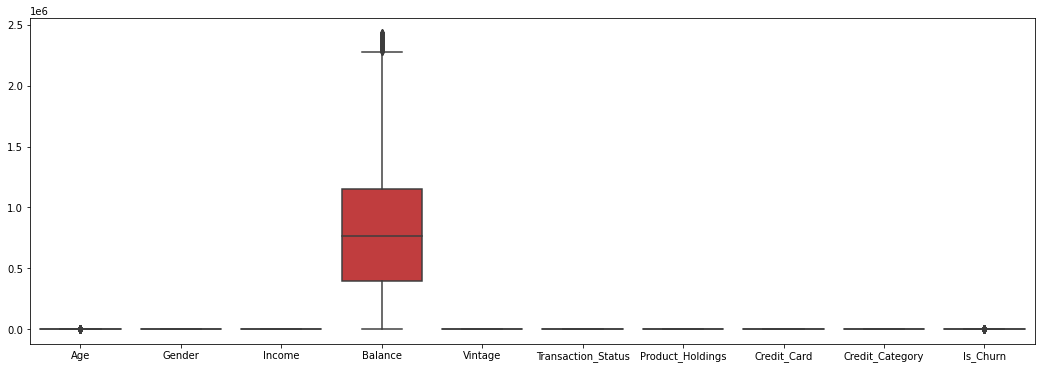

In [22]:
fig,ax=plt.subplots(figsize=(18,6))
sns.boxplot(data=data1,ax=ax)

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(data1.iloc[:,:-1])
data_sc=pd.DataFrame(sc.fit_transform(data1.iloc[:,:-1]),index=data1.index,columns=data1.columns[:-1])

In [24]:
data_sc['Is_churn']=data1['Is_Churn']

In [25]:
data_sc.tail()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_churn
2846,-0.120736,-1.089566,0.515023,1.026445,-1.526752,-1.026560,-0.979783,0.708614,-0.969956,NaN
2847,0.707057,-1.089566,1.460942,1.238229,-1.526752,0.974127,0.751465,0.708614,0.275221,NaN
2848,1.845274,0.917796,1.460942,0.567668,0.516684,-1.026560,-0.979783,0.708614,-0.969956,NaN
2849,-0.741582,-1.089566,-0.430895,1.343403,-0.164461,-1.026560,-0.979783,0.708614,-0.969956,NaN
2850,2.052222,-1.089566,0.515023,0.207500,-1.526752,0.974127,0.751465,0.708614,1.520397,NaN


<AxesSubplot:>

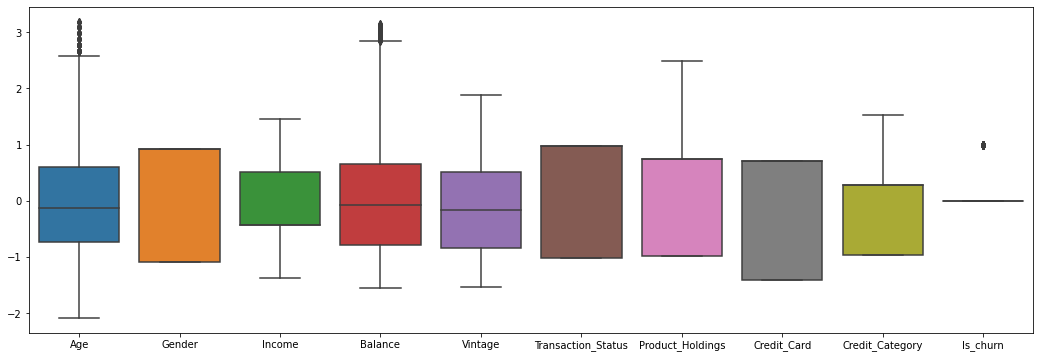

In [26]:
fig,ax=plt.subplots(figsize=(18,6))
sns.boxplot(data=data_sc,ax=ax)

In [27]:
data_sc.describe()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_churn
count,9.501000e+03,9.501000e+03,9.501000e+03,9.501000e+03,9.501000e+03,9.501000e+03,9.501000e+03,9.501000e+03,9.501000e+03,6650.000000
mean,-2.725019e-17,2.421200e-17,4.341099e-17,-5.843248e-17,2.434054e-16,-4.604954e-16,-7.741062e-16,-2.863139e-16,-9.892331e-16,0.231128
std,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,1.000053e+00,0.421586
min,-2.086746e+00,-1.089566e+00,-1.376814e+00,-1.554549e+00,-1.526752e+00,-1.026560e+00,-9.797832e-01,-1.411205e+00,-9.699561e-01,0.000000
25%,-7.415816e-01,-1.089566e+00,-4.308953e-01,-7.924923e-01,-8.456064e-01,-1.026560e+00,-9.797832e-01,-1.411205e+00,-9.699561e-01,0.000000
50%,-1.207363e-01,9.177964e-01,-4.308953e-01,-7.904702e-02,-1.644613e-01,9.741268e-01,7.514647e-01,7.086144e-01,2.752206e-01,0.000000
75%,6.035833e-01,9.177964e-01,5.150235e-01,6.618963e-01,5.166838e-01,9.741268e-01,7.514647e-01,7.086144e-01,2.752206e-01,0.000000
max,3.190439e+00,9.177964e-01,1.460942e+00,3.144160e+00,1.878974e+00,9.741268e-01,2.482713e+00,7.086144e-01,1.520397e+00,1.000000


# Checking for Outliers

In [28]:
Q1,Q3,IQR,cut_off,Outlier={},{},{},{},{}
for i in data_sc.columns[:-1]:
    Q1[i]=np.round(np.percentile(data_sc[i],25),3) #Computing 25th Percentile
    Q3[i]=np.round(np.percentile(data_sc[i],75),3) #Computing 75th Percentile
    IQR[i]=np.round(Q3[i]-Q1[i],3) #computing IQR
    cut_off[i]=[np.round((Q1[i]-1.5*IQR[i]),3),np.round((Q3[i]+1.5*IQR[i]),3)] #cut_off range
    Outlier[i]=len(data_sc[i])-len(data_sc[data_sc[i].between(cut_off[i][0],cut_off[i][1])][i])

In [29]:
for i in data_sc.columns[:-1]:
    print(i,' -- ','Cut off range -- ',cut_off[i],'Total Outliers: ',Outlier[i]) 

Age  --  Cut off range --  [-2.761, 2.623] Total Outliers:  82
Gender  --  Cut off range --  [-4.102, 3.93] Total Outliers:  0
Income  --  Cut off range --  [-1.85, 1.934] Total Outliers:  0
Balance  --  Cut off range --  [-2.973, 2.843] Total Outliers:  56
Vintage  --  Cut off range --  [-2.891, 2.562] Total Outliers:  0
Transaction_Status  --  Cut off range --  [-4.028, 3.976] Total Outliers:  0
Product_Holdings  --  Cut off range --  [-3.577, 3.348] Total Outliers:  0
Credit_Card  --  Cut off range --  [-4.591, 3.889] Total Outliers:  0
Credit_Category  --  Cut off range --  [-2.838, 2.142] Total Outliers:  0


**Out of total Train & Test, there are very less Outliers. We can Drop them only from Train Data_set**

In [30]:
train_sc=data_sc.iloc[:6650,:]
test_sc=data_sc.iloc[6650:,:]

In [31]:
train_sc.tail()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_churn
6645,2.052222,0.917796,-0.430895,1.057431,1.197829,0.974127,0.751465,0.708614,-0.969956,1.0
6646,0.086212,-1.089566,-0.430895,-0.404777,0.516684,0.974127,0.751465,0.708614,0.275221,0.0
6647,-1.258953,0.917796,-1.376814,0.333832,-0.164461,-1.026560,0.751465,-1.411205,-0.969956,0.0
6648,2.569593,-1.089566,0.515023,-0.792492,0.516684,-1.026560,0.751465,0.708614,-0.969956,1.0
6649,-0.431159,0.917796,1.460942,0.040035,-0.845606,0.974127,0.751465,-1.411205,1.520397,0.0


In [32]:
train_sc.shape

(6650, 10)

In [33]:
test_sc.drop('Is_churn',axis=1,inplace=True)

In [34]:
test_sc.shape

(2851, 9)

**Checking outliers only in Train Dataset**

In [35]:
Q1,Q3,IQR,cut_off,Outlier={},{},{},{},{}
for i in train_sc.columns:
    Q1[i]=np.round(np.quantile(train_sc[i],.25),3) #Computing 25th Percentile
    Q3[i]=np.round(np.quantile(train_sc[i],.75),3) #Computing 75th Percentile
    IQR[i]=np.round(Q3[i]-Q1[i],3) #computing IQR
    cut_off[i]=[np.round((Q1[i]-1.5*IQR[i]),3),np.round((Q3[i]+1.5*IQR[i]),3)] #cut_off range
    Outlier[i]=len(train_sc[i])-len(train_sc[train_sc[i].between(cut_off[i][0],cut_off[i][1])][i])

In [36]:
for i in train_sc.columns:
    print(i,' -- ','Cut off range -- ',cut_off[i],'Total Outliers: ',Outlier[i]) 

Age  --  Cut off range --  [-2.761, 2.623] Total Outliers:  57
Gender  --  Cut off range --  [-4.102, 3.93] Total Outliers:  0
Income  --  Cut off range --  [-1.85, 1.934] Total Outliers:  0
Balance  --  Cut off range --  [-2.98, 2.84] Total Outliers:  38
Vintage  --  Cut off range --  [-2.891, 2.562] Total Outliers:  0
Transaction_Status  --  Cut off range --  [-4.028, 3.976] Total Outliers:  0
Product_Holdings  --  Cut off range --  [-3.577, 3.348] Total Outliers:  0
Credit_Card  --  Cut off range --  [-4.591, 3.889] Total Outliers:  0
Credit_Category  --  Cut off range --  [-2.838, 2.142] Total Outliers:  0
Is_churn  --  Cut off range --  [0.0, 0.0] Total Outliers:  1537


# Dropping the Outliers from Train_sc DataSet.

In [37]:
train_out=train_sc.copy(deep=True)

In [38]:
train_out[~train_sc['Age'].between(-2.761,2.623)]['Age'].index

Int64Index([  40,   78,  160,  222,  338,  405,  658,  660,  988, 1027, 1111,
            1225, 1273, 1364, 1366, 1469, 1515, 1546, 1636, 1724, 1966, 1997,
            2095, 2289, 2351, 2518, 2537, 2648, 2656, 2896, 2992, 3004, 3696,
            3964, 3984, 4104, 4456, 4457, 4460, 4471, 4504, 5092, 5226, 5227,
            5238, 5434, 5470, 5613, 5711, 5771, 5780, 5817, 5909, 5997, 6113,
            6145, 6180],
           dtype='int64')

In [39]:
train_out=train_out.drop([  40,   78,  160,  222,  338,  405,  658,  660,  988, 1027, 1111,
            1225, 1273, 1364, 1366, 1469, 1515, 1546, 1636, 1724, 1966, 1997,
            2095, 2289, 2351, 2518, 2537, 2648, 2656, 2896, 2992, 3004, 3696,
            3964, 3984, 4104, 4456, 4457, 4460, 4471, 4504, 5092, 5226, 5227,
            5238, 5434, 5470, 5613, 5711, 5771, 5780, 5817, 5909, 5997, 6113,
            6145, 6180])

In [40]:
train_out[~train_out['Balance'].between(-2.98,2.84)]['Balance'].index

Int64Index([  84,  336,  542,  757,  969, 1132, 1327, 1528, 1545, 2142, 2271,
            2405, 2488, 2511, 2608, 2693, 2758, 2865, 2897, 3522, 3526, 3549,
            3574, 4004, 4013, 4215, 4364, 4396, 4705, 4874, 4970, 5152, 5532,
            5938, 5945, 6090, 6168, 6526],
           dtype='int64')

In [41]:
train_out=train_out.drop([  84,  336,  542,  757,  969, 1132, 1327, 1528, 1545, 2142, 2271,
            2405, 2488, 2511, 2608, 2693, 2758, 2865, 2897, 3522, 3526, 3549,
            3574, 4004, 4013, 4215, 4364, 4396, 4705, 4874, 4970, 5152, 5532,
            5938, 5945, 6090, 6168, 6526])

In [42]:
train_out.shape

(6555, 10)

In [43]:
train_out.head()

,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_churn
0,-0.534633,-1.089566,-0.430895,-0.468454,1.197829,-1.026560,-0.979783,-1.411205,0.275221,1.0
1,1.224429,-1.089566,-1.376814,0.133804,-0.164461,0.974127,-0.979783,0.708614,-0.969956,0.0
2,-0.638107,-1.089566,1.460942,-0.201674,-0.164461,0.974127,0.751465,-1.411205,-0.969956,0.0
3,0.189686,-1.089566,1.460942,1.133403,-1.526752,0.974127,0.751465,0.708614,-0.969956,1.0
4,-0.224210,-1.089566,1.460942,0.167695,-0.845606,0.974127,-0.979783,0.708614,1.520397,1.0


<AxesSubplot:>

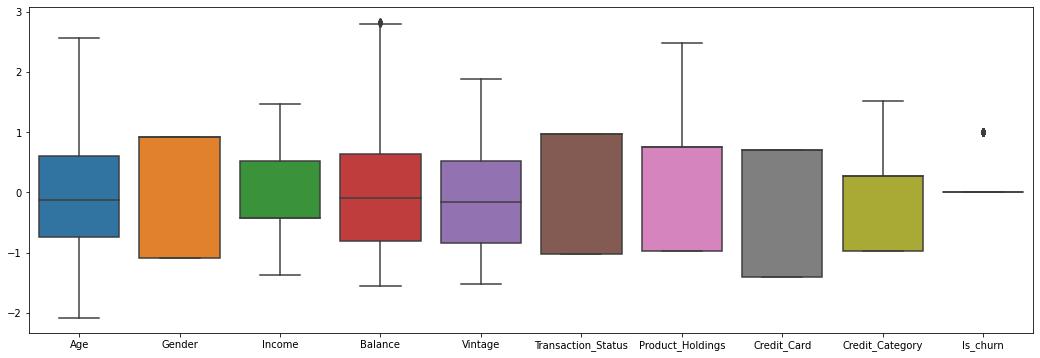

In [44]:
fig,ax=plt.subplots(figsize=(18,6))
sns.boxplot(data=train_out,ax=ax)

# EDA

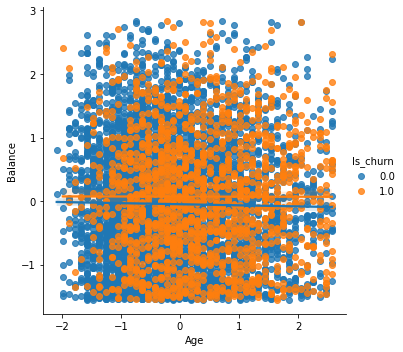

In [45]:
sns.lmplot('Age','Balance',data=train_out,hue='Is_churn')

<Figure size 864x864 with 0 Axes>

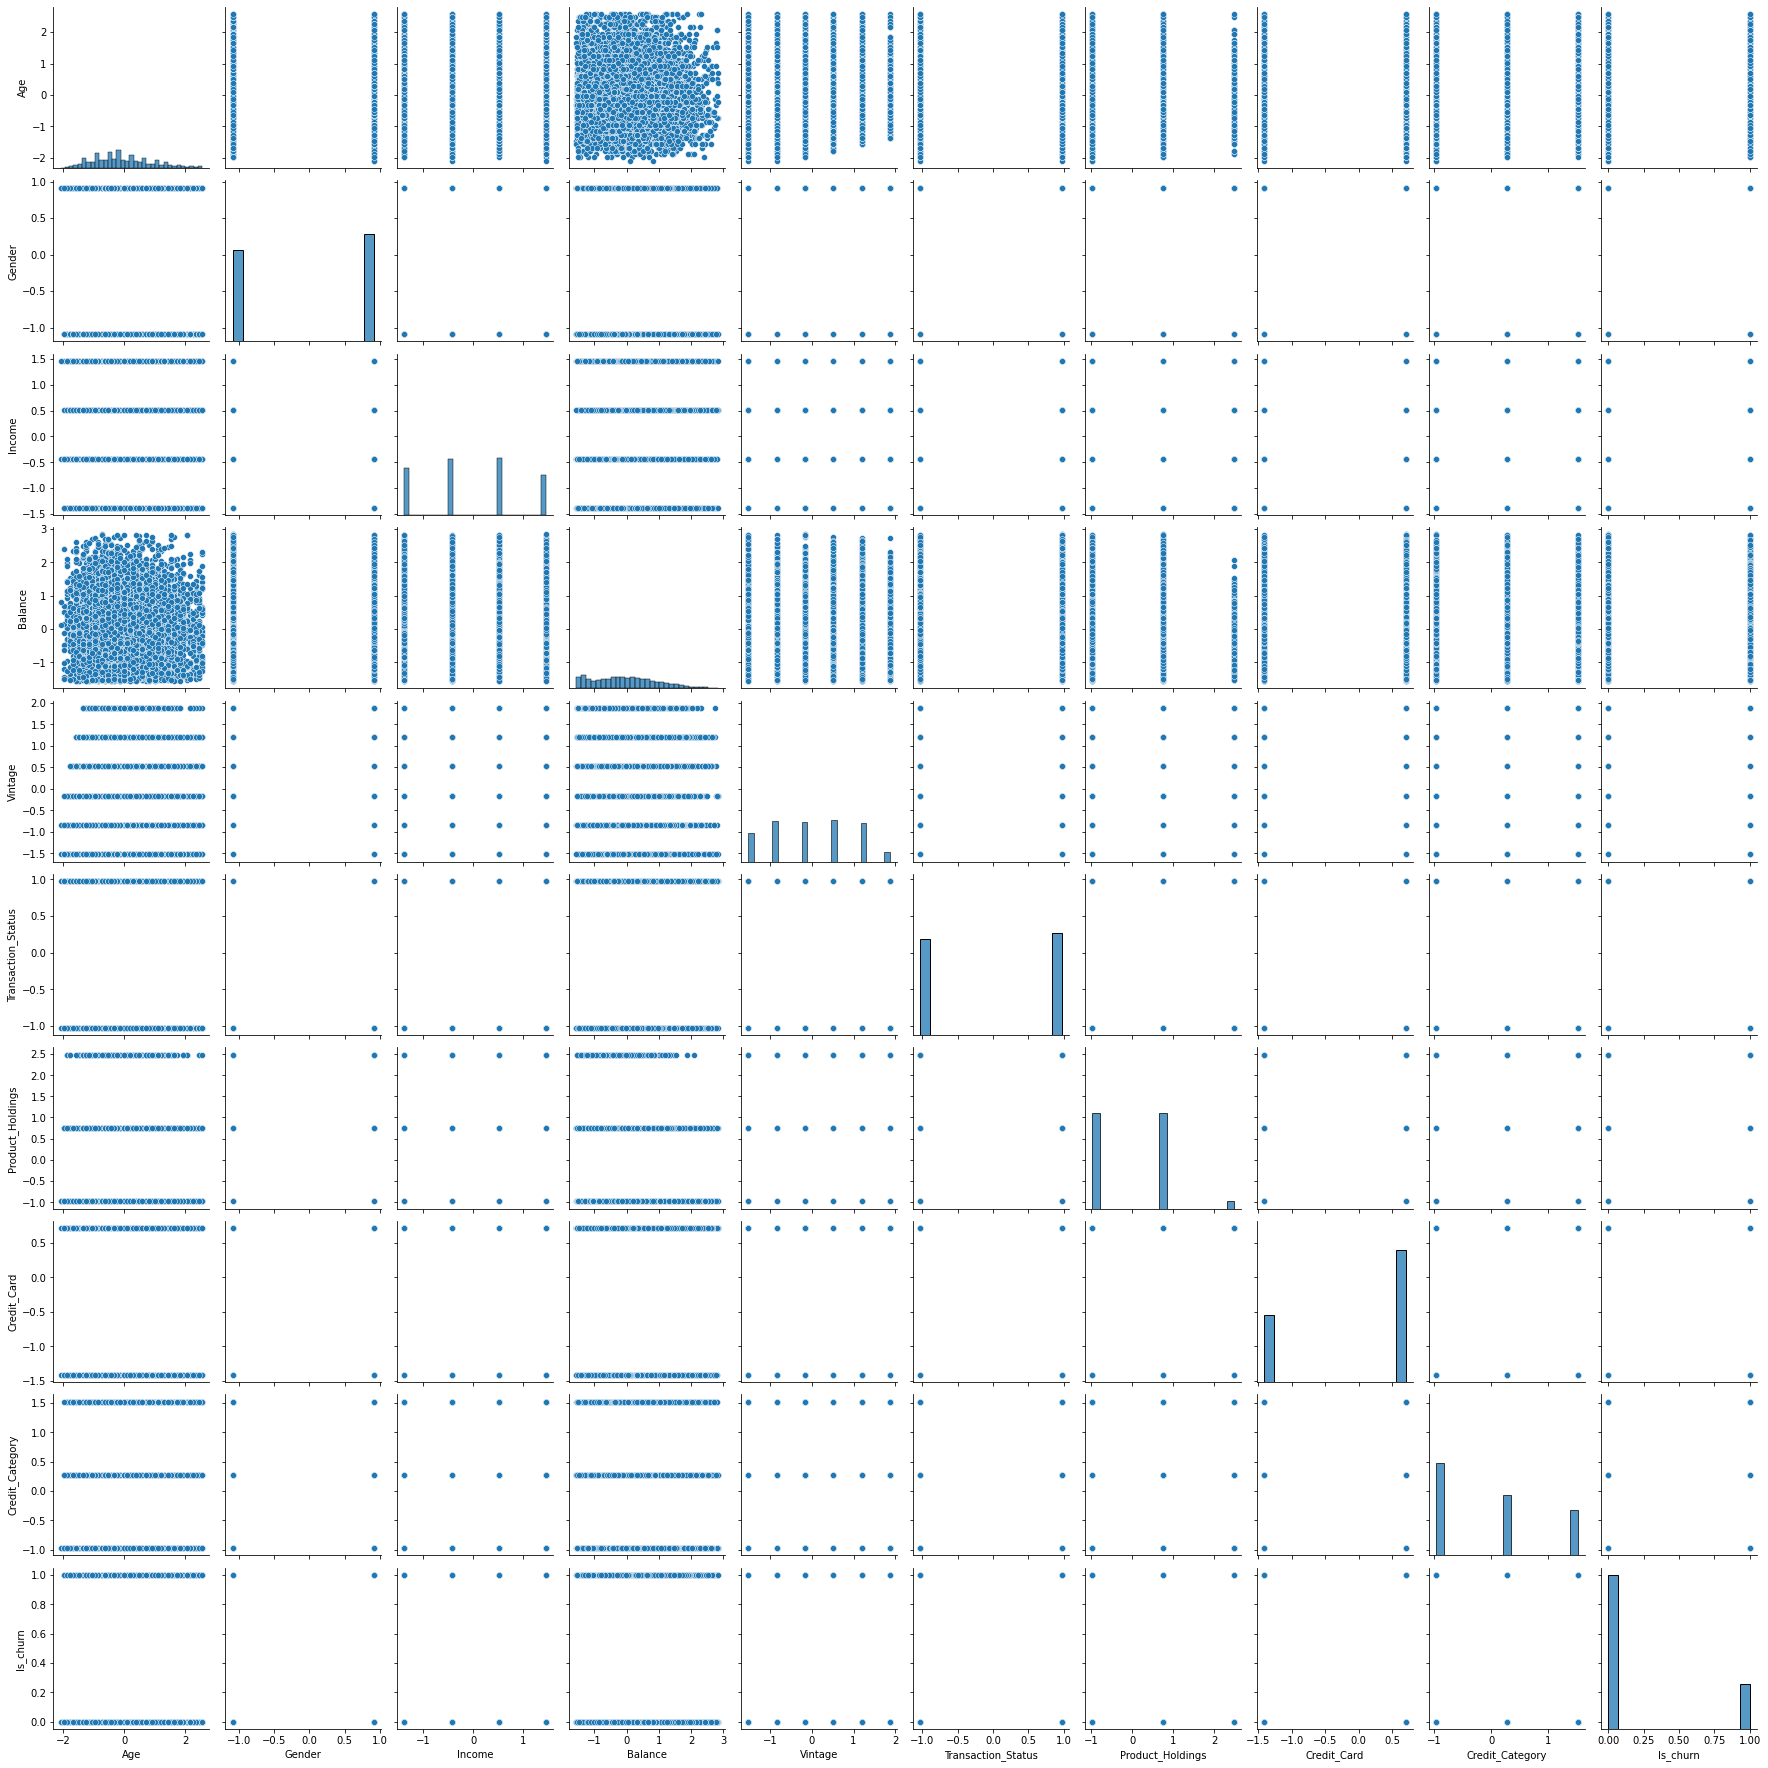

In [46]:
plt.figure(figsize=(12,12))
sns.pairplot(train_out)

<AxesSubplot:>

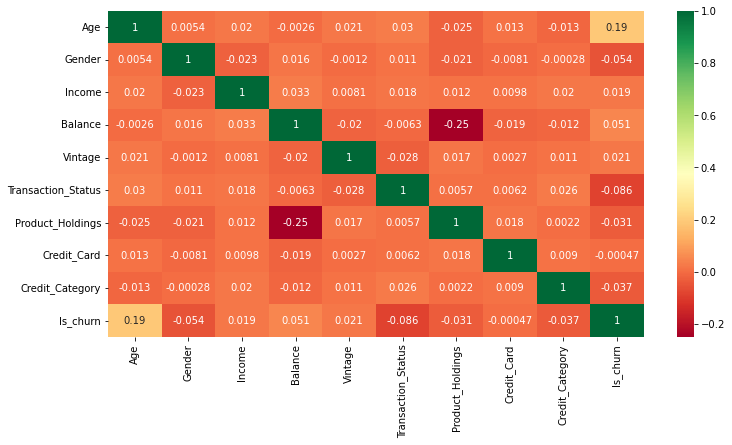

In [47]:
corr=pd.DataFrame(train_out.corr('spearman'),columns=train_out.columns)
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True,cmap='RdYlGn')

# TRAIN TEST SPLIT

In [48]:
X=train_out.iloc[:,:-1]
Y=train_out.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=.8,random_state=42)

# MODELLING

In [49]:
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier

**MODEL INSTANTIATION**

In [50]:
ran=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=100,min_samples_leaf=11,min_samples_split=17,class_weight='balanced')
ran.fit(X_train,Y_train)
print('Train Score: ',np.round(ran.score(X_train,Y_train),2))
print('CV Score: ',np.round(ran.score(X_test,Y_test),2))

Train Score:  0.78
CV Score:  0.65


In [51]:
ran_res=pd.DataFrame(d_test['ID'],columns=['ID'])
ran_res['Is_Churn']=ran.predict(test_sc).astype('int')
ran_res.to_csv('GEN_RAN_res.csv',index=False)

In [52]:
bag=BaggingClassifier(n_estimators=20,base_estimator=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=100,min_samples_leaf=9,min_samples_split=17,class_weight='balanced'))
bag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(class_weight='balanced',
                                                        max_depth=100,
                                                        min_samples_leaf=9,
                                                        min_samples_split=17),
                  n_estimators=20)

In [53]:
print('Train Score: ',np.round(bag.score(X_train,Y_train),2))
print('CV Score: ',np.round(bag.score(X_test,Y_test),2))

Train Score:  0.78
CV Score:  0.68


In [54]:
bag_res=pd.DataFrame(d_test['ID'],columns=['ID'])
bag_res['Is_Churn']=bag.predict(test_sc).astype('int')
bag_res.to_csv('FINAL_BAG_RAN_res.csv',index=False)